<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/pv_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [32]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [33]:
df=pd.read_excel("/content/pv_16.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [34]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	25
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	25
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	25
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	25
Iteration: 	12 / 100
Confirmed: 	14
Tentative: 	10
Rejected: 	25
Iteration: 	13 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	14
Tentative: 	9
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	14
Tentative: 	9
R

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=135,
                                         random_state=RandomState(MT19937) at 0x7F9472600340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F9472600340, verbose=2)

In [35]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [36]:
inputs1

<KerasTensor: shape=(None, 2, 18) dtype=float32 (created by layer 'input_2')>

In [37]:
from keras import optimizers

In [38]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
51/51 [==============================] - 17s 78ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2/100
51/51 [==============================] - 2s 45ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 3/100
51/51 [==============================] - 2s 46ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 4/100
51/51 [==============================] - 2s 41ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 5/100
51/51 [==============================] - 2s 40ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 6/100
51/51 [==============================] - 2s 41ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 7/100
51/51 [==============================] - 2s 42ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 8/100
51/51 [==============================] - 2s 42ms/step - loss: 0

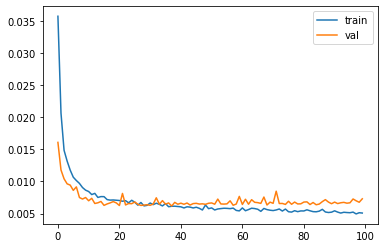

62/62 [==============================] - 2s 10ms/step


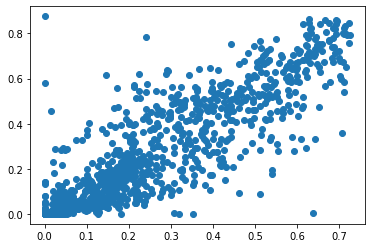

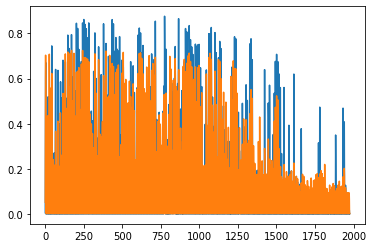

0.08803058610960224


In [39]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
51/51 [==============================] - 19s 74ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 2/200
51/51 [==============================] - 2s 39ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 3/200
51/51 [==============================] - 2s 39ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4/200
51/51 [==============================] - 2s 39ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 5/200
51/51 [==============================] - 2s 41ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 6/200
51/51 [==============================] - 2s 45ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 7/200
51/51 [==============================] - 2s 39ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 8/200
51/51 [==============================] - 2s 39ms/step - loss: 0

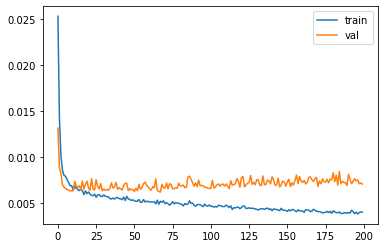

62/62 [==============================] - 2s 9ms/step


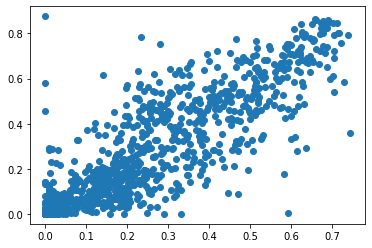

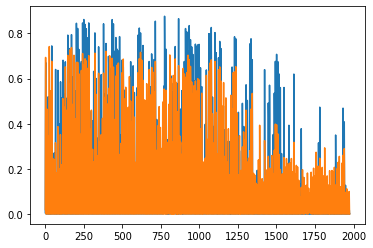

0.09142806974399346


In [40]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

In [41]:
from keras.layers import Bidirectional

Epoch 1/75
51/51 [==============================] - 35s 155ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 2/75
51/51 [==============================] - 5s 97ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3/75
51/51 [==============================] - 5s 93ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4/75
51/51 [==============================] - 4s 88ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 5/75
51/51 [==============================] - 5s 91ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 6/75
51/51 [==============================] - 5s 94ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 7/75
51/51 [==============================] - 5s 94ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 8/75
51/51 [==============================] - 5s 91ms/step - loss: 0.0064 -

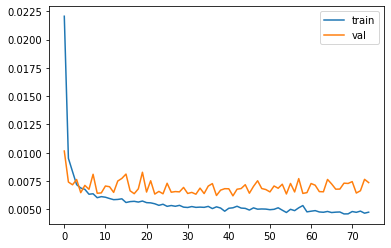

62/62 [==============================] - 4s 19ms/step


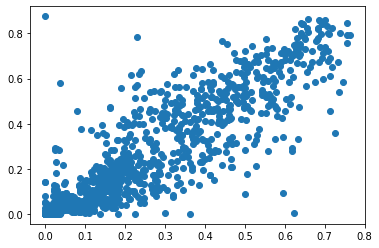

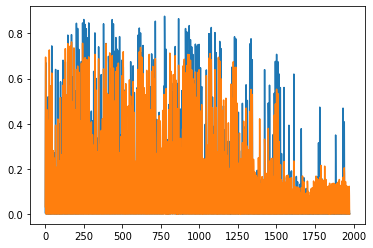

0.08643552642789315


In [42]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/75
51/51 [==============================] - 65s 171ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 2/75
51/51 [==============================] - 5s 90ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3/75
51/51 [==============================] - 5s 93ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 4/75
51/51 [==============================] - 5s 96ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 5/75
51/51 [==============================] - 5s 92ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 6/75
51/51 [==============================] - 5s 90ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 7/75
51/51 [==============================] - 4s 88ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 8/75
51/51 [==============================] - 5s 94ms/step - loss: 0.0059 -

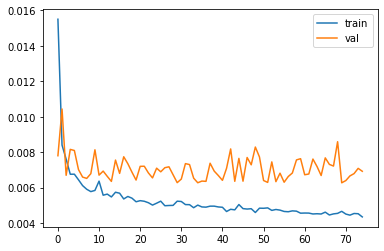

62/62 [==============================] - 4s 15ms/step


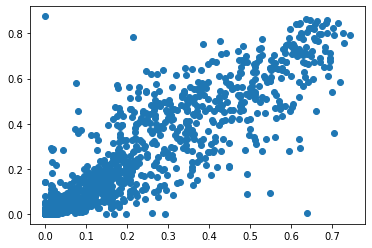

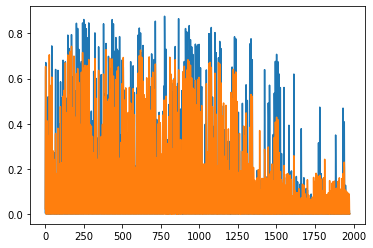

0.08910249282265979


In [44]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))